## Problem Set 4 - Ryan Yordanoff - BF550

# Determine the expected number of distinct sequences at the end of the PCR

In [1]:
import numpy as np

def seq_gen(l=100):
    """Generates a random 100bp sequence and outputs a list"""
    seq = ''
    nts = ['A', 'T', 'C', 'G']

    for i in range(l):
        seq += np.random.choice(nts)
    return seq

#Sequence used for each analysis
SEQUENCE = seq_gen()

def PCR_simulate(u,seq=SEQUENCE,n=13):
    """Amplifies DNA 2^n times.  Takes a string sequence as input and outputs a dictionary
    with respective count (values) for each distinct sequence (keys)."""
    current_seq = seq[:] 
    seq_dict = {}
    seq_dict[current_seq] = 1
    j_amp = seq[:]
    nts = ['A', 'T', 'C', 'G']
    initial = True
    
    for i in range(n+1): #loop through n  (+1 to get 2^n sequences)
        
        for j in seq_dict.copy().items(): #loop through each seq dictionary Example: (->'ATTT...T'<-, 2)
            
            for k in range(j[1]): #loops through to duplicate each strand stored  Example: ('ATTT...T', ->2<-)

                #adding replicated string to seq_dict
                if initial == True:  #for the inital; don't add to counter
                    initial = False
                    j_amp = ''
                    pass
                
                #adds to counter if non-distinct
                elif j_amp in seq_dict:
                    seq_dict[j_amp] += 1
                    j_amp = ''
                #adds sequence as new key in dictionary
                else:
                    seq_dict[j_amp] = 1
                    j_amp = ''

                
                for bp in j[0]: #duplication of each strand

                    random_roll = np.random.random()

                    if random_roll > (1 - u):
                        nts.remove(bp) #this creates a 1/3 chance of substitution
                        j_amp += np.random.choice(nts)
                        nts.append(bp) #sets nts back to default
                    else:
                        j_amp += bp

    return seq_dict

#Only used to swap sequence with a distinct label for plotting (used primarily for u = 10**-4 )
def convert_dict_groups(d):
    """Takes dictionary of string (key) & n (value) and converts to distinct groups.

    Example:   {'ATC':2, 'GGG':1} --converts to--> {S1:2, S2:1}
    """
    d_copy = d.copy()
    keys = []
    values = d_copy.values()


    for i in enumerate(d_copy.keys()):
        keys.append(f'S{i[0]+1}')

    return dict(zip(keys, values))




print(f'u = 10**-4 Distinct Sequences: {len(PCR_simulate(10**-4))}')
print(f'u = 10**-3 Distinct Sequences: {len(PCR_simulate(10**-3))}')
print(f'u = 10**-2 Distinct Sequences: {len(PCR_simulate(10**-2))}')

u = 10**-4 Distinct Sequences: 70
u = 10**-3 Distinct Sequences: 484
u = 10**-2 Distinct Sequences: 5110


# Visualize the distribution of relative abundances of these sequences

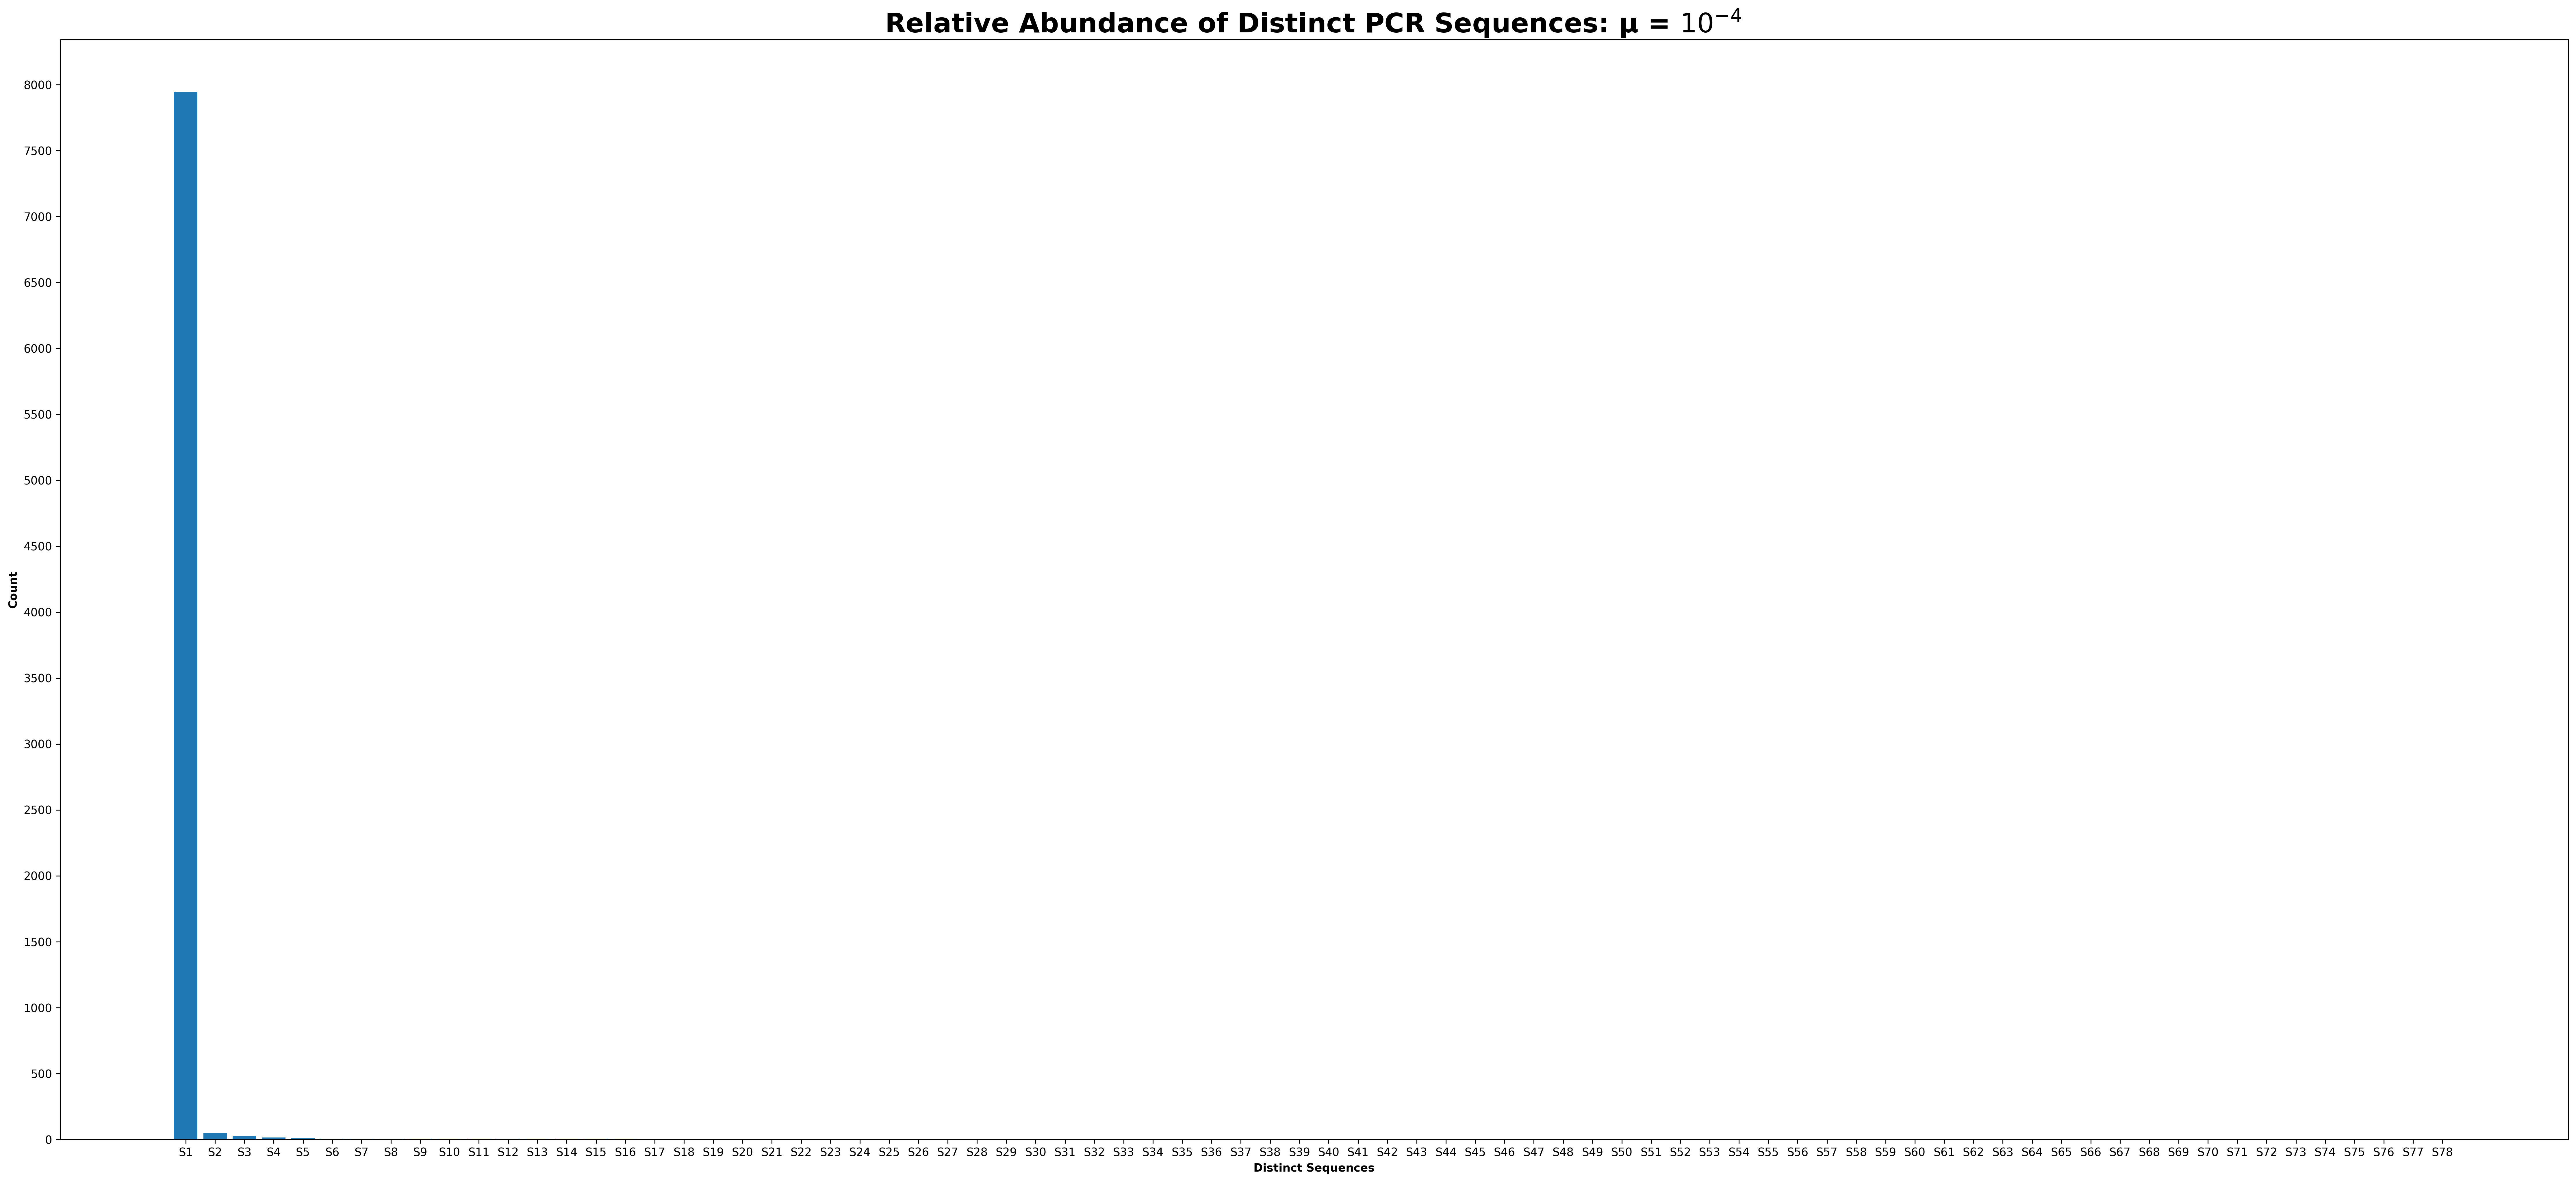

In [7]:
import matplotlib.pyplot as plt


PCR_neg4 = PCR_simulate(10**-4)

plt.figure(num=None, figsize=(40,18), dpi=280, facecolor='w', edgecolor='r')
plt.xlabel('Distinct Sequences', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Relative Abundance of Distinct PCR Sequences: μ = $10^{−4}$ ', fontweight='bold', fontsize = 24)

PCR_neg4_keys = convert_dict_groups(PCR_neg4).keys() #x values
PCR_neg4_values = PCR_neg4.values() #y values

plt.yticks(range(0,max(PCR_neg4_values)+500,500))


plt.bar(PCR_neg4_keys,PCR_neg4_values)

plt.show()

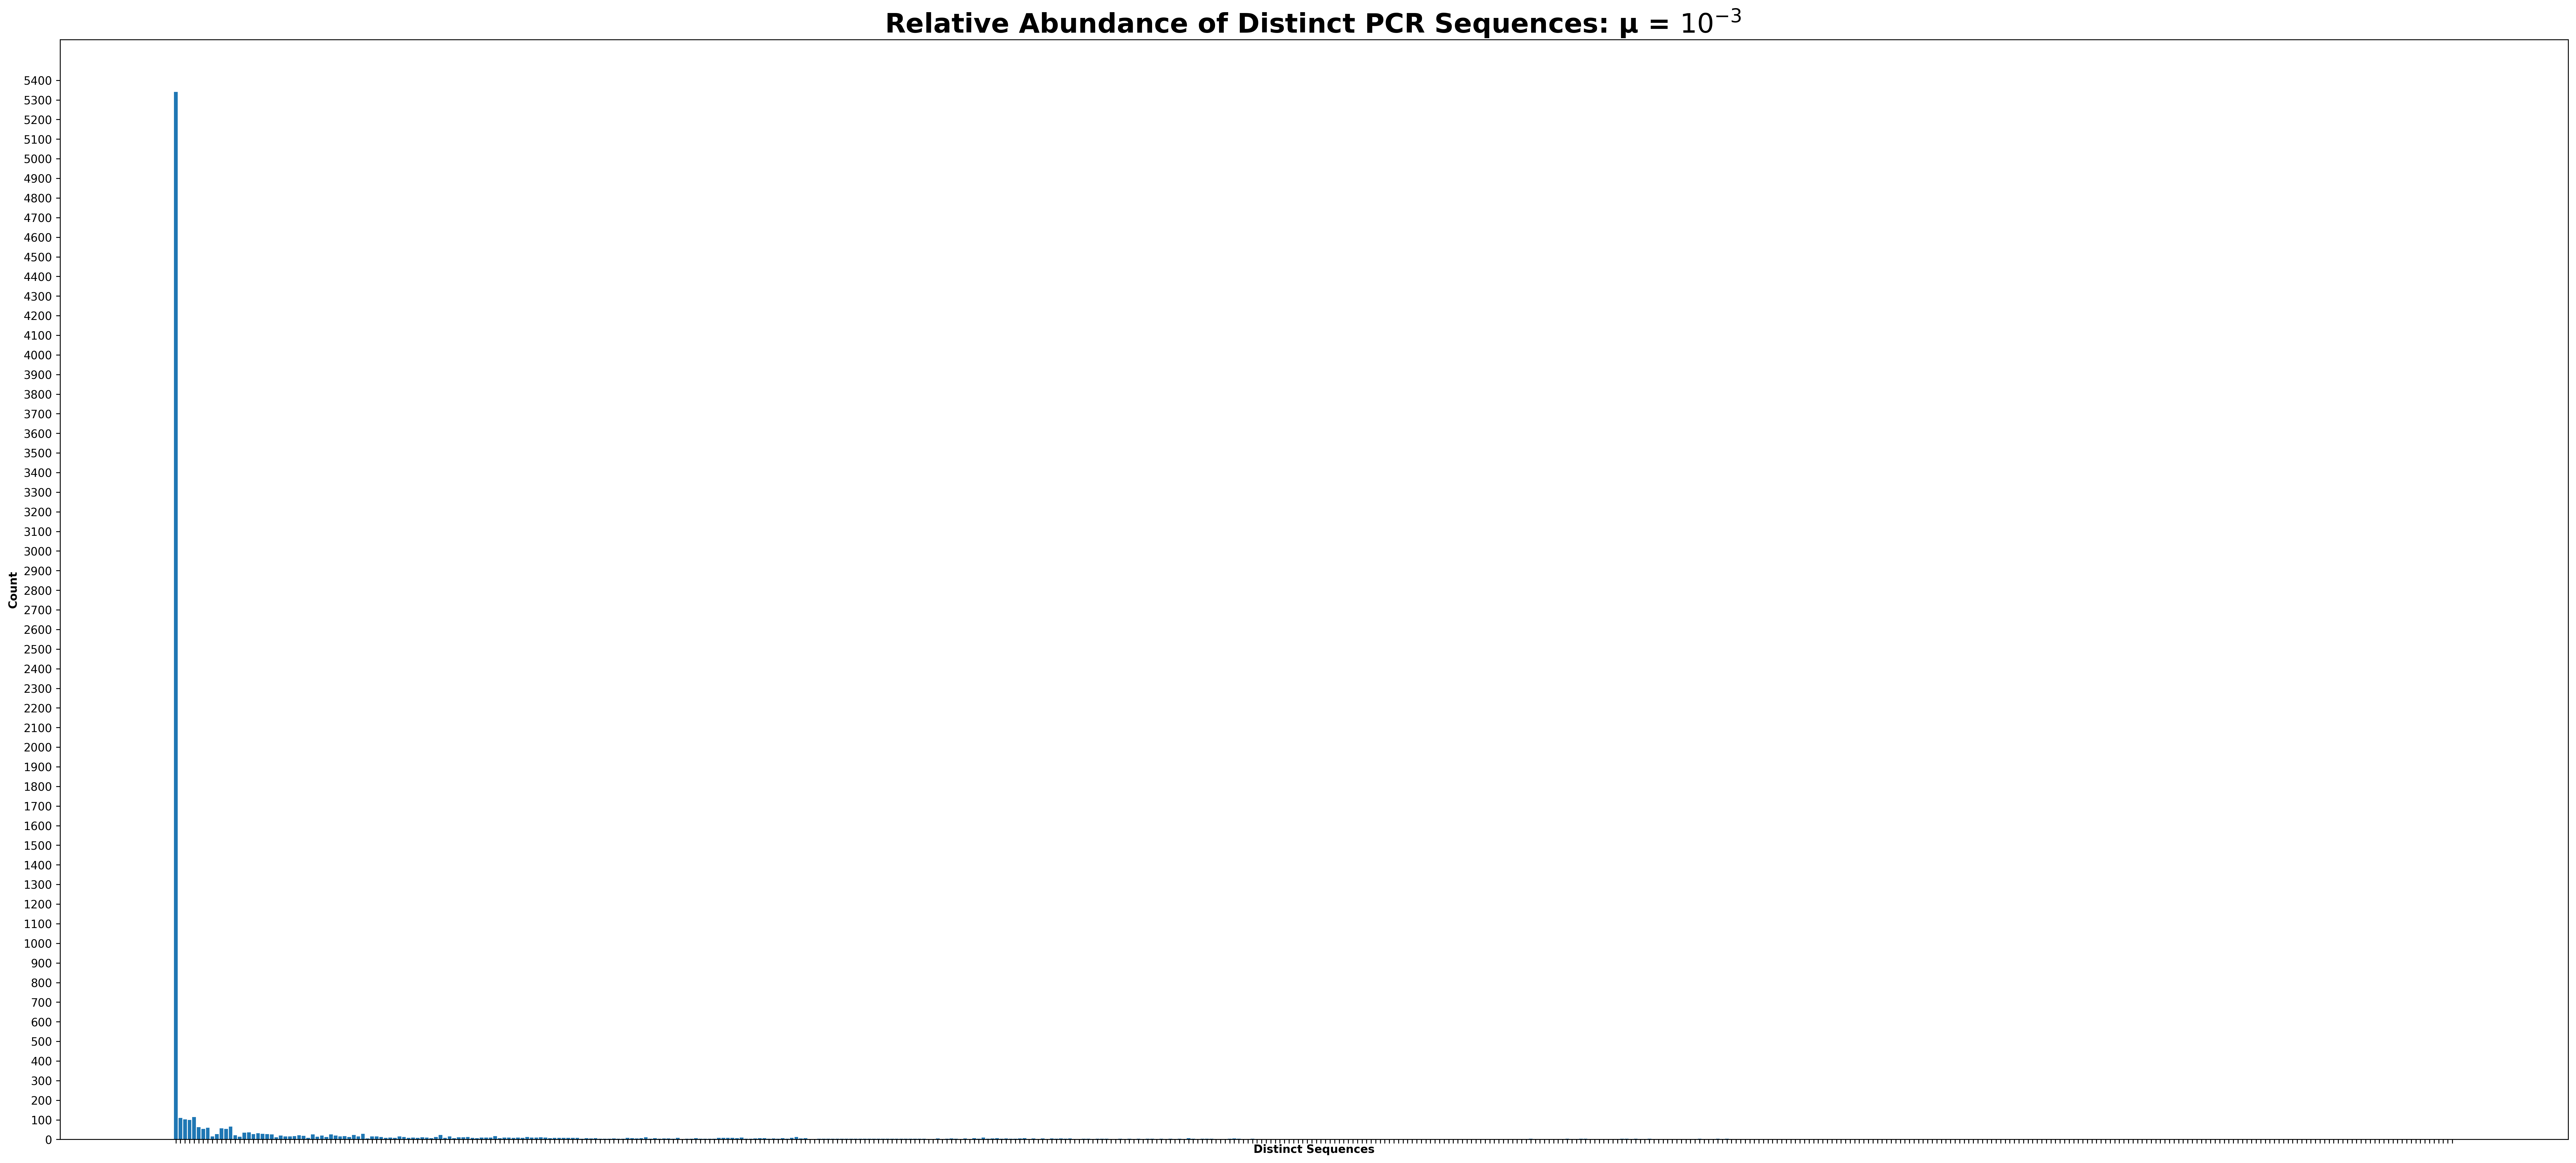

In [10]:
import matplotlib.pyplot as plt


PCR_neg3 = PCR_simulate(10**-3)

plt.figure(num=None, figsize=(40,18), dpi=280, facecolor='w', edgecolor='r')
plt.xlabel('Distinct Sequences', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Relative Abundance of Distinct PCR Sequences: μ = $10^{−3}$ ', fontweight='bold', fontsize = 24)

PCR_neg3_keys = convert_dict_groups(PCR_neg3).keys() #x values
PCR_neg3_values = PCR_neg3.values() #y values

plt.yticks(range(0,max(PCR_neg3_values)+100,100))

plt.tick_params(labelbottom=False) #hides x labels as they are too congested


plt.bar(PCR_neg3_keys,PCR_neg3_values)

plt.show()

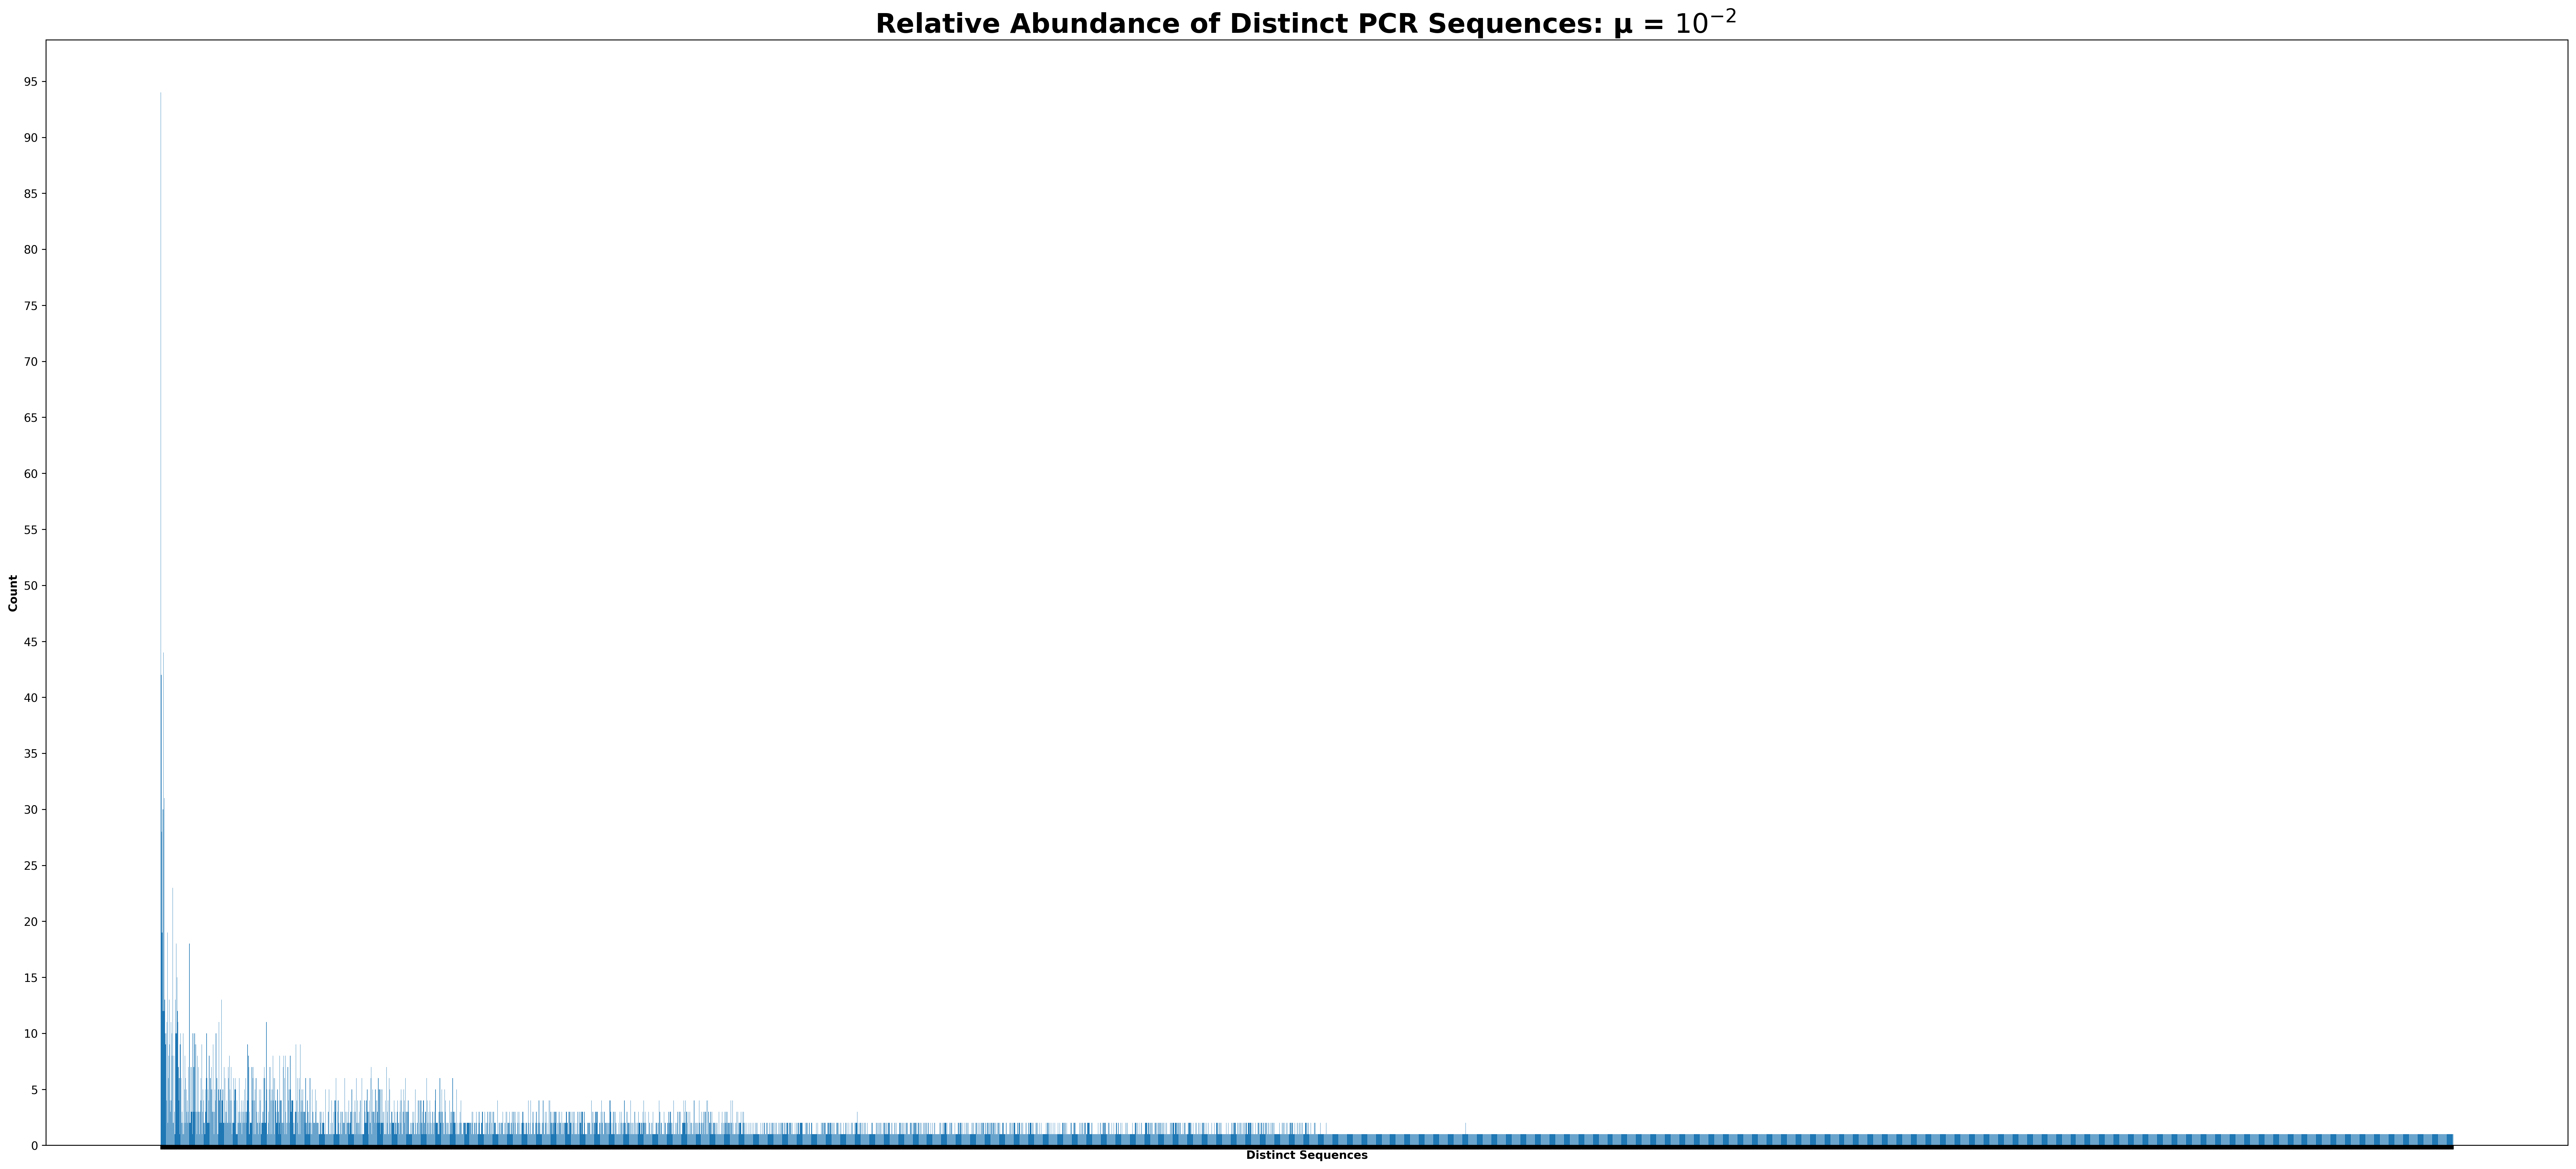

In [11]:
import matplotlib.pyplot as plt


PCR_neg2 = PCR_simulate(10**-2)

plt.figure(num=None, figsize=(40,18), dpi=280, facecolor='w', edgecolor='r')
plt.xlabel('Distinct Sequences', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Relative Abundance of Distinct PCR Sequences: μ = $10^{−2}$ ', fontweight='bold', fontsize = 24)

PCR_neg2_keys = convert_dict_groups(PCR_neg2).keys() #x values
PCR_neg2_values = PCR_neg2.values() #y values

plt.yticks(range(0,max(PCR_neg2_values)+10,5))

plt.tick_params(labelbottom=False) #hides x labels as they are too congested

plt.bar(PCR_neg2_keys,PCR_neg2_values)

plt.show()

# Compute the effective number of sequences using the definition based on entropy.

In [12]:
import math

def effective_number(d):
    d_copy = d.copy()
    n = 8192
    s_raw = 0    

    for i in d_copy.values():
        s_raw += ((i/n)*(math.log((i/n))))

    s = s_raw * (-1)
    N_eff = math.exp(s)

    return N_eff



In [35]:
PCR_neg4 = PCR_simulate(10**-4)
PCR_neg3 = PCR_simulate(10**-3)
PCR_neg2 = PCR_simulate(10**-2)

print(f'u = 10**-4 Effective Number of Sequences: {round(effective_number(PCR_neg4))}         (Neff = {effective_number(PCR_neg4)})')
print(f'u = 10**-3 Effective Number of Sequences: {round(effective_number(PCR_neg3))}        (Neff = {effective_number(PCR_neg3)})')
print(f'u = 10**-2 Effective Number of Sequences: {round(effective_number(PCR_neg2))}      (Neff = {effective_number(PCR_neg2)})')

u = 10**-4 Effective Number of Sequences: 1         (Neff = 1.198834979709338)
u = 10**-3 Effective Number of Sequences: 15        (Neff = 14.739708606610598)
u = 10**-2 Effective Number of Sequences: 3630      (Neff = 3629.858292902553)


# Optional: Find the confidence interval for the expected number of distinct sequences



In [42]:
import math

def sample_PCR(u, seq=SEQUENCE, n=13, r=40):
    """Runs PCR_simulate r times and adds each output to a list, which is returned. """
    distinct_seqs = []

    for i in range(r):
        distinct_seqs.append(len(PCR_simulate(u,seq,n)))
    
    return distinct_seqs

#only works for samples of r = 40 due to t being hard coded
def confidence_interval(l):
    """Outputs the mean and confidence interval at 95% confidence, with an input being a list of 40 integers """
    n = len(l)
    dof = n-1
    s = np.std(l)
    t = 2.022691 #95% Confidence: (two-tailed) t value for 39 Degrees of Freedom
    x_bar = mean(l)
    
    CI = t*(s/(math.sqrt(n)))

    return (x_bar,CI)

In [48]:
sample_1 = sample_PCR(10**-4)

print(f'u = 10**-4; The mean number of distinct sequences: {confidence_interval(sample_1)[0]} +- {round(confidence_interval(sample_1)[1],2)} at 95% confidence ')

u = 10**-4; The mean number of distinct sequences: 70.95 +- 1.87 at 95% confidence 


After researching this question: "Explain which distribution did you use, standard normal or t?" extensively, I have come to the conclusion to use t distribution. 

I am running greater than 30 samples (40 to be exact), so I was tempted to use a standard normal, thus Z value to determine my confidence interval.  However, technically the standard normal distribution assumes that we know the population standard deviation, which we are unaware of.

Due to the central limit theorem,  I could have done the calculation as an approximate Z-test as my sample size was large (40), however the population variance is unknown; so technically the t-distribution would be more correct, albeit in this case very similar to a normal distribution.

# Supplementary Material (to show that code is running correctly)

In [50]:
print(SEQUENCE)
print(len(SEQUENCE))

CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA
100


In [54]:
sim_sup = PCR_simulate(10**-4)
print(sim_sup)

{'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 7917, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTTTAGACAACCCGACCACA': 24, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCGCTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 16, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGACGATTCTAGACAACCCGACCACA': 16, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGAAGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 16, 'CTTGTCATTTTACGGTCATGGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 17, 'CTTGTCATTTTACGGTCATAGGGCCCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 12, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACATCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGATTCTAGACAACCCGACCACA': 9, 'CTTGTCATTTTACGGTCATAGGGCGCCTTGGTAACACACGTCACATTTGCACTTTCCGATGTTCTATCTACTATCGAAGACTCTAGACAACCCGACCACA': 8, 'CATGTCATTTTACGGTCATAGGGCGC

In [55]:
print(convert_dict_groups(sim_sup))

{'S1': 7917, 'S2': 24, 'S3': 16, 'S4': 16, 'S5': 16, 'S6': 17, 'S7': 12, 'S8': 9, 'S9': 8, 'S10': 8, 'S11': 8, 'S12': 8, 'S13': 8, 'S14': 8, 'S15': 8, 'S16': 8, 'S17': 6, 'S18': 4, 'S19': 4, 'S20': 4, 'S21': 3, 'S22': 2, 'S23': 2, 'S24': 2, 'S25': 2, 'S26': 2, 'S27': 2, 'S28': 2, 'S29': 2, 'S30': 2, 'S31': 2, 'S32': 2, 'S33': 2, 'S34': 2, 'S35': 2, 'S36': 2, 'S37': 2, 'S38': 2, 'S39': 2, 'S40': 3, 'S41': 2, 'S42': 3, 'S43': 3, 'S44': 1, 'S45': 1, 'S46': 1, 'S47': 1, 'S48': 1, 'S49': 1, 'S50': 1, 'S51': 1, 'S52': 1, 'S53': 1, 'S54': 1, 'S55': 1, 'S56': 1, 'S57': 1, 'S58': 2, 'S59': 1, 'S60': 1, 'S61': 1, 'S62': 1, 'S63': 1, 'S64': 1, 'S65': 1, 'S66': 1, 'S67': 1, 'S68': 1, 'S69': 1, 'S70': 1, 'S71': 1, 'S72': 1, 'S73': 1, 'S74': 1, 'S75': 1}


In [56]:
print(effective_number(sim_sup))

1.3144490782111231


In [59]:
sim_sup2 = sample_PCR(10**-4)

print(sim_sup2)

[74, 77, 79, 62, 79, 73, 64, 68, 79, 63, 72, 84, 77, 73, 90, 64, 71, 77, 69, 60, 80, 87, 76, 73, 57, 69, 86, 80, 64, 66, 75, 74, 62, 69, 77, 74, 79, 75, 64, 70]


In [62]:
print(confidence_interval(sim_sup2))

(72.8, 2.4389996911999337)
